<a href="https://colab.research.google.com/github/gregbunce/Blogs/blob/master/episodic_memories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Human Brain as a Geographic Information System (GIS)**


This python notebook accompanies the article, ["Cognitive Maps: The Science Behind our Brain’s Internal Mapping and Navigation System"](www.link.com).

Below we will explore what the human brain's cognitive mapping system might look like using a software-based Geographic Information System (GIS).

In keeping with the openminded theme, this project is built with open source ([OGC](https://www.opengeospatial.org/)) software and tools.  Using [PostgreSQL](https://www.postgresql.org/)/[PostGIS](https://postgis.net/), the database is hosted in the cloud ([Google Cloud Platform](https://cloud.google.com/)) and the data was created using the [QGIS](https://qgis.org/en/site/) application. To facilitate the database transactions, we'll use the python libray [Psycopg](http://initd.org/psycopg/).



---



*Note: to run this python notebook you will need to execute the bracketed ```[ ] code blocks``` in consecutive order.*

***1. Install Python dependencies into memory***

In [0]:
pip install psycopg2


***2. Import the required libraries***

In [0]:
import psycopg2
import psycopg2.extras

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


***3. Create Database (the brain) and enable Spatial Extention (hippocampus)***  -- *Note: this section contains an example db transaction. It will not run in this notebook.*

```
CREATE DATABASE my_memories;
CREATE EXTENSION postgis;
```

***4. Create Database Tables (the storage containers in the brain)*** -- *Note: this section contains an example db transaction. It will not run in this notebook.*



```
CREATE TABLE memories (
    id                 serial PRIMARY KEY, 
    shape              geography(POINT,4326),
    event              varchar(80),
    timeframe          varchar(80),
    people             varchar(80),
    items              varchar(80),
    place              varchar(20),
    place_attributes   varchar(80)
);
```





```
CREATE TABLE places (
    id                 serial PRIMARY KEY, 
    shape              geography(POLYGON,4326),
    place              varchar(20),
    state              varchar(10)
);
```



***5. Insert Record into Tables (create a memory)*** -- *Note: this section contains an example db transaction. It will not run in this notebook.*



```
-- insert september 11th, 2001 memory
INSERT INTO memories (event, timeframe, people, items, place, place_attributes, shape) 
VALUES ('September 11th', '2001', 'friends','make-shift media center; TVs','University Union','smell of fast-food breakfast; speckled tile flooring', 'SRID=4326;POINT(40.765029,-111.845664)');
```



```
-- insert spatial aspect of september 11th, 2001 memory
INSERT INTO places (place, state, shape) 
VALUES ('University Union, Salt Lake City', 'Utah', 'SRID=4326;POLYGON(....)');
```

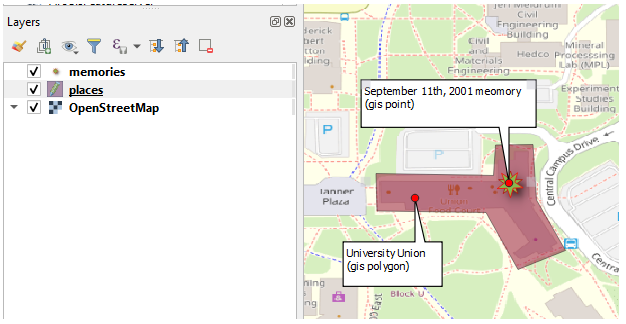

***6. Insert Additional Record into Tables (create an additional memory)*** -- *Note: this section contains an example db transaction. It will not run in this notebook.*

```
-- insert early childhood christmas memory at great grandmother's house
INSERT INTO memories (event, timeframe, people, items, place, place_attributes, shape) 
VALUES ('christmas', '1984', 'great grandmother, brother','ribbon candy; vintage battery-operated santa; dominos; welch's jelly juice cups','Massapequa Park, Long Island','pink tiled bath; pink padded toilet seat; white table doilies; yellow wall oven', 'SRID=4326;POINT(40.684079,-73.454340)');
```

```
-- insert spatial aspect early childhood christmas memory
INSERT INTO places (place, state, shape) 
VALUES ('Massapequa Park, Long Island', 'New York', 'SRID=4326;POLYGON(....)');
```

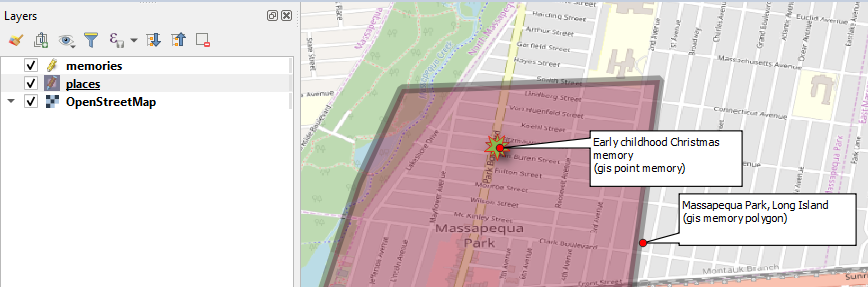

***7. Connect to Database (stimulate the brain)***

In [0]:
#: Connect to database using Python.
conn_string = "host='34.68.64.207' dbname='my_memories' user='memory_reader' password='retrieve_memories'"
conn = psycopg2.connect(conn_string)

***8. Perform Spatial Query on Database (retrieve an existing an memory from geographic location)***

In [0]:
cursor = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)

#: build spatial query.
spatial_query = "SELECT event, timeframe, people, items, place_attr FROM memories a, places b WHERE a.place = 'University of Utah' AND ST_Within(a.geom, b.geom)"

#: execute spatial the query.
cursor.execute(spatial_query)
for row in cursor:
  print(row)

['September 11th', '2001', 'friends', 'make-shift media center; TVs', 'smell of fast-food breakfast; speckled tile flooring']


***9. Perform Table Query on Database (retrieve an existing an memory from a sensory observation)***

In [0]:
cursor = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)

#: build table query.
table_query = "SELECT event, timeframe, people, items, place_attr FROM memories WHERE items LIKE '%ribbon candy%'"

#: execute table query.
cursor.execute(table_query)
for row in cursor:
  print(row)

['christmas', '1984', 'great grandma; brother', "ribbon candy; vintage battery-operated santa; dominos; welch's jelly juice cups", 'pink tiled bath; pink padded toilet seat; white table doilies; yellow wall oven']
